In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
ab=pd.read_csv('heart.csv')

In [5]:
ab.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
ab.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
ab.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
ab.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
ab['sex'].value_counts().shape[0] #finds out the no. of unique items in a column

2

In [11]:
for i in list(ab.columns):
    print("{} -- {}".format(i,ab[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [12]:
category_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

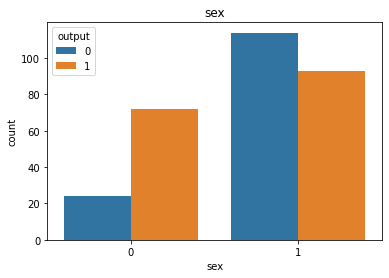

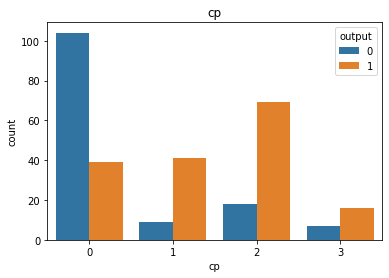

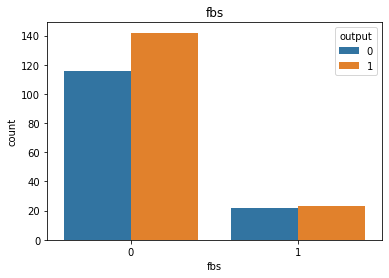

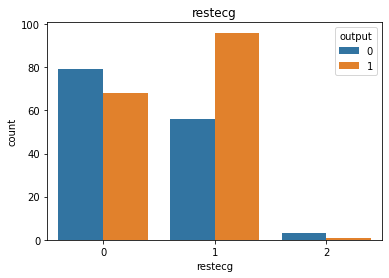

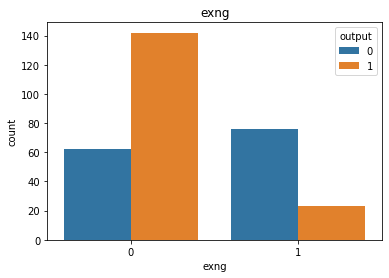

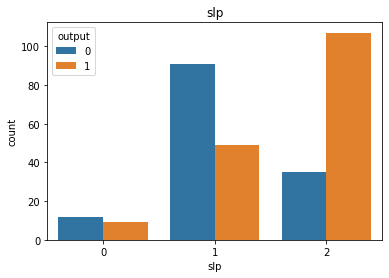

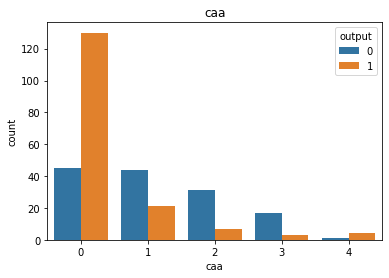

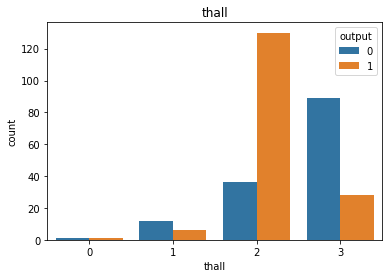

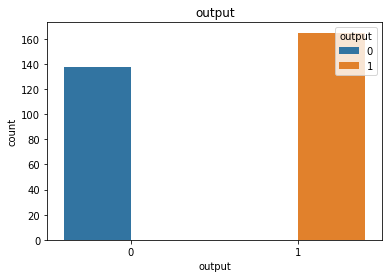

In [13]:
ab_category=ab.loc[:,category_list]
for i in category_list:
    plt.figure()
    sns.countplot(x=i,data=ab_category,hue="output")
    plt.title(i)

In [14]:
numerical_list=["age","trtbps","chol","thalachh","oldpeak","output"]

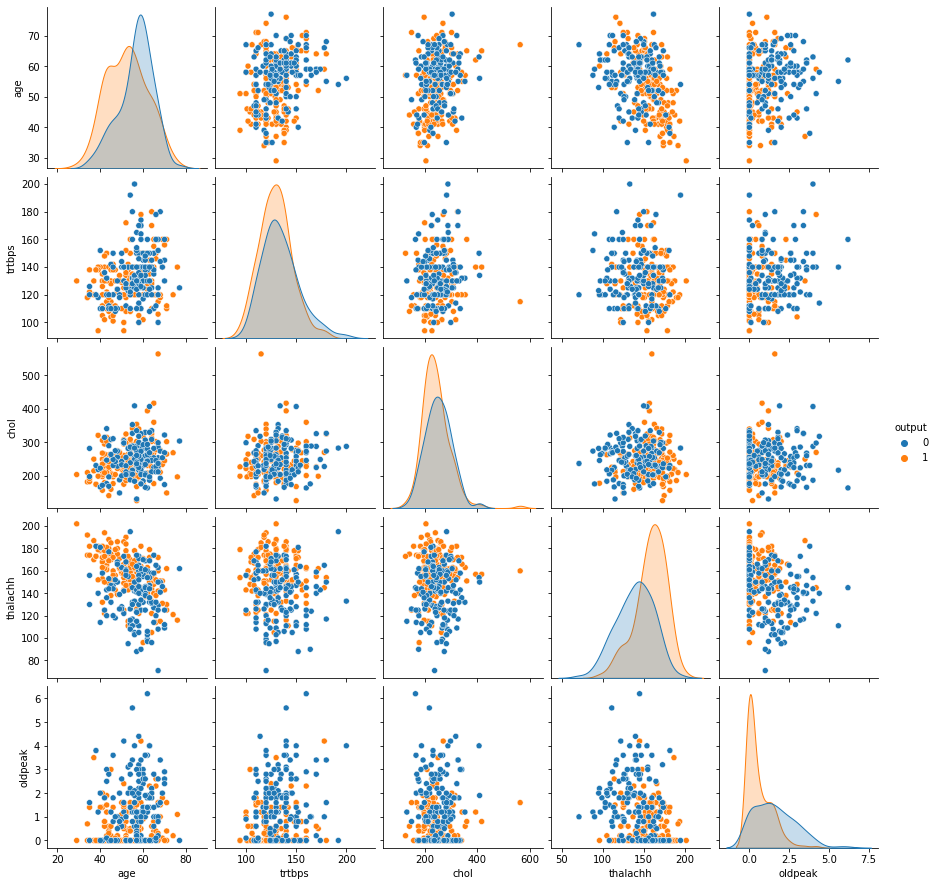

In [15]:
ab_numerical=ab.loc[:,numerical_list]
sns.pairplot(ab_numerical,hue="output",diag_kind="kde")
plt.show()

In [16]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(ab[numerical_list[:-1]])

In [17]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [18]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [19]:
ab_dummy=pd.DataFrame(scaled_array,columns=numerical_list[:-1])
ab_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [20]:
ab_dummy=pd.concat([ab_dummy,ab.loc[:,"output"]],axis=1)
ab.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
data_melted=pd.melt(ab_dummy,id_vars="output",var_name="features",value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


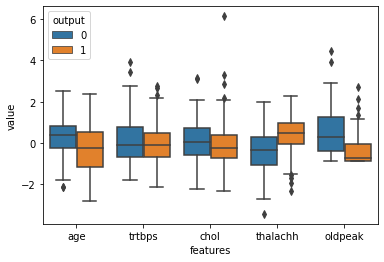

In [22]:
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

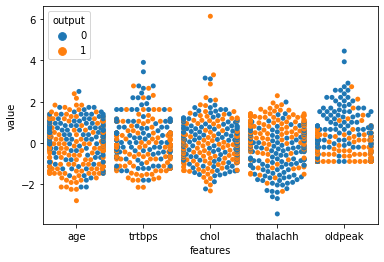

In [23]:
plt.figure()
sns.swarmplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

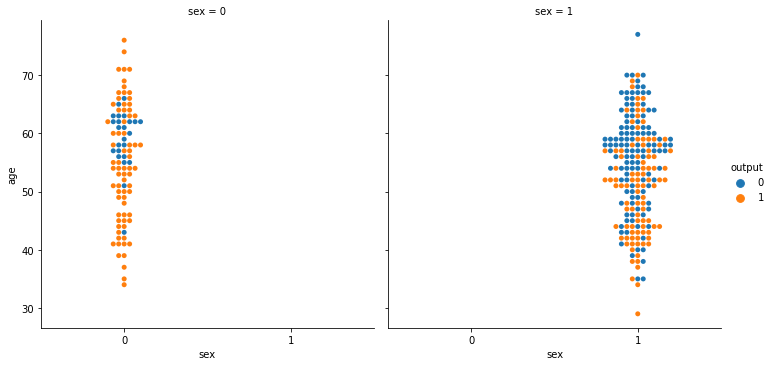

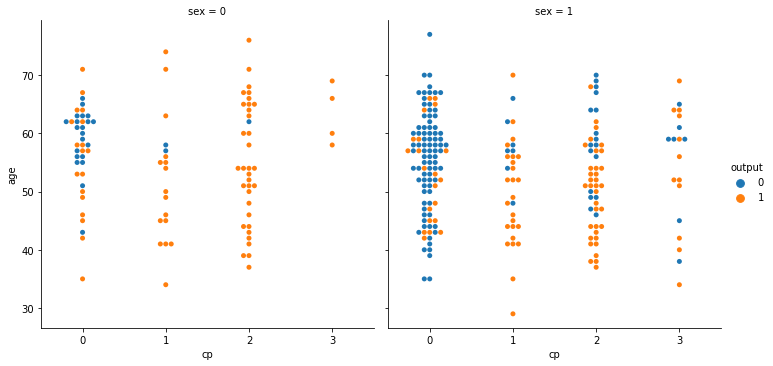

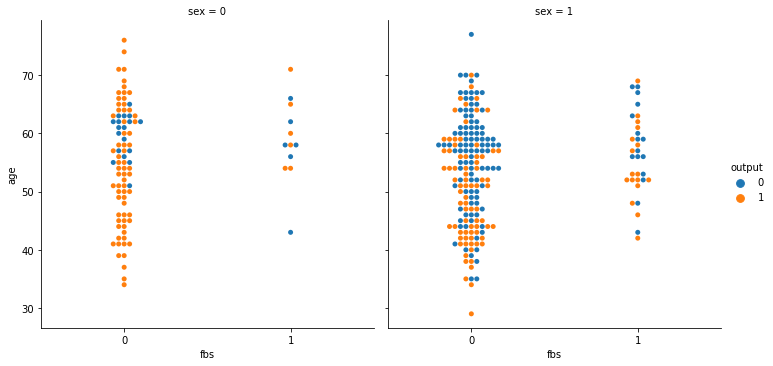

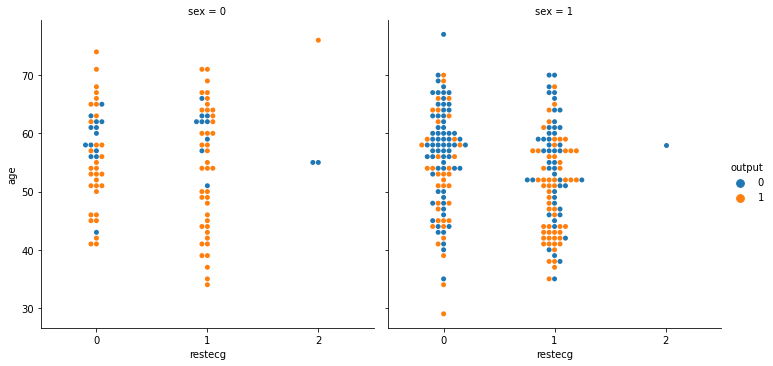

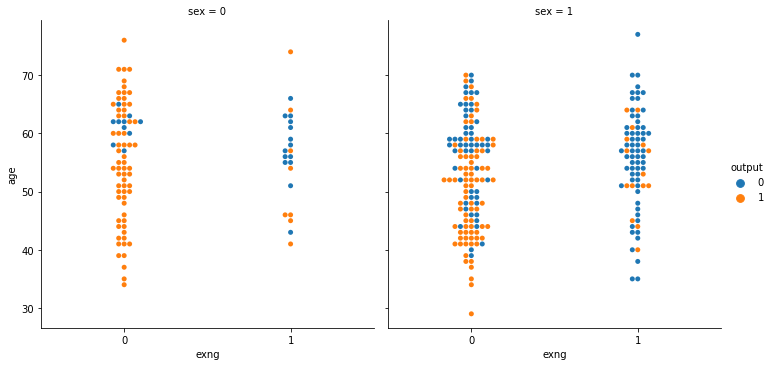

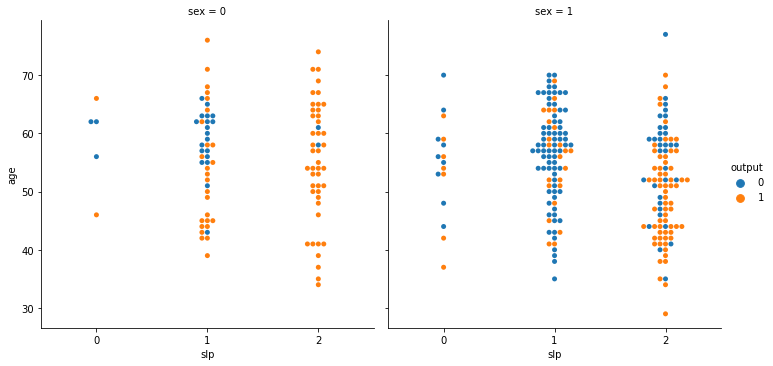

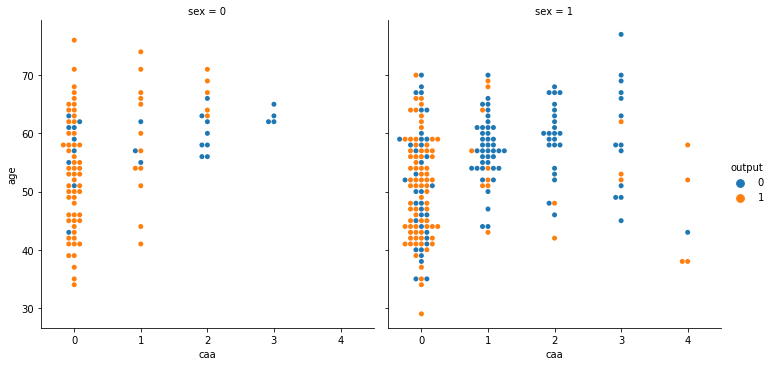

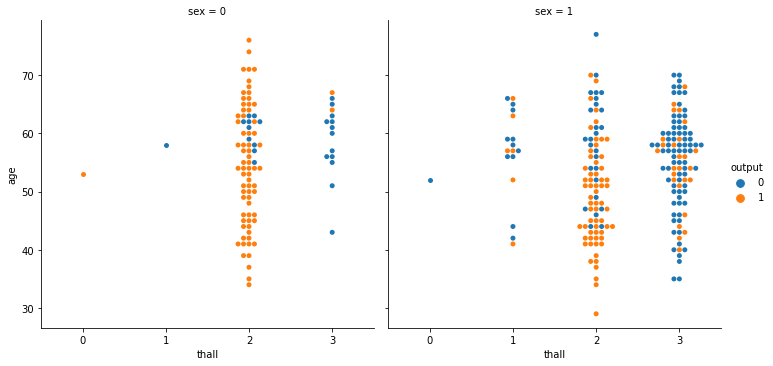

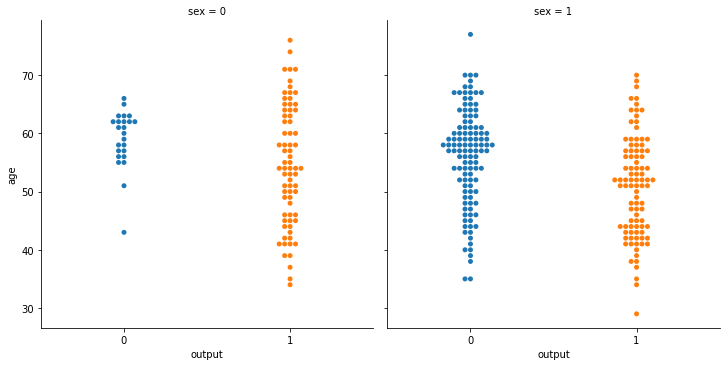

In [24]:
for i in category_list:
    sns.catplot(x=i,y="age",hue="output",col="sex",kind="swarm",data=ab)
    plt.show()

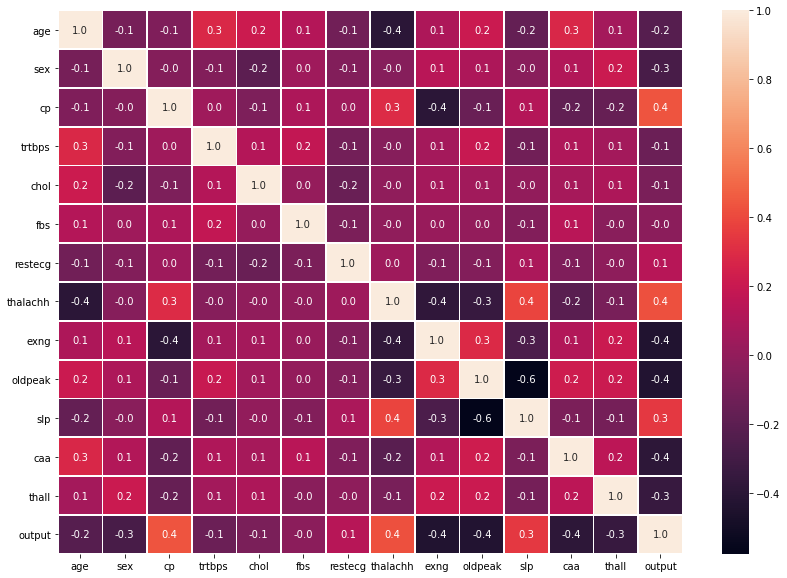

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(ab.corr(),annot=True,fmt=".1f",linewidth=.7)
plt.show()

In [26]:
numerical_list = ["age", "trtbps","chol","thalachh","oldpeak"]
ab_numerical = ab.loc[:, numerical_list]
ab_numerical.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [27]:
ab.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
for i in numerical_list:
    
    # IQR
    Q1 = np.percentile(ab.loc[:, i],25)
    Q3 = np.percentile(ab.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", ab.loc[:, i].shape)
    
    # upper bound
    upper = np.where(ab.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(ab.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        ab.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        ab.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", ab.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (298, 14)


In [29]:
ab1=ab.copy()

In [30]:
ab1=pd.get_dummies(ab1,columns=category_list[:-1],drop_first=True)
ab1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [31]:
X=ab1.drop(['output'],axis=1)
y=ab1[['output']]

## Feature Scaling


In [32]:
scaler=StandardScaler()
scaler

StandardScaler()

In [33]:
X[numerical_list[:-1]]=scaler.fit_transform(X[numerical_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.303950,-0.666538,2.297269,0.590082,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)
print("X_train: {}".format(X_train.shape))

print("X_train: {}".format(X_test.shape))

print("X_train: {}".format(y_train.shape))

print("X_train: {}".format(y_test.shape))

X_train: (268, 22)
X_train: (30, 22)
X_train: (268, 1)
X_train: (30, 1)


## Logistic Regression

In [35]:
logr=LogisticRegression()
logr.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [36]:
y_pred_prob=logr.predict_proba(X_test)
y_pred_prob

array([[0.94252608, 0.05747392],
       [0.06987766, 0.93012234],
       [0.11254982, 0.88745018],
       [0.47977949, 0.52022051],
       [0.08754891, 0.91245109],
       [0.01966602, 0.98033398],
       [0.01313076, 0.98686924],
       [0.25608762, 0.74391238],
       [0.93025651, 0.06974349],
       [0.04680322, 0.95319678],
       [0.95711862, 0.04288138],
       [0.01124265, 0.98875735],
       [0.41858447, 0.58141553],
       [0.6057325 , 0.3942675 ],
       [0.02733085, 0.97266915],
       [0.0261538 , 0.9738462 ],
       [0.84053044, 0.15946956],
       [0.03593571, 0.96406429],
       [0.86161159, 0.13838841],
       [0.97599523, 0.02400477],
       [0.6204125 , 0.3795875 ],
       [0.31203666, 0.68796334],
       [0.93491854, 0.06508146],
       [0.00474821, 0.99525179],
       [0.44481395, 0.55518605],
       [0.33837871, 0.66162129],
       [0.03945105, 0.96054895],
       [0.99154232, 0.00845768],
       [0.46749931, 0.53250069],
       [0.69698284, 0.30301716]])

In [37]:
y_pred=np.argmax(y_pred_prob,axis=1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

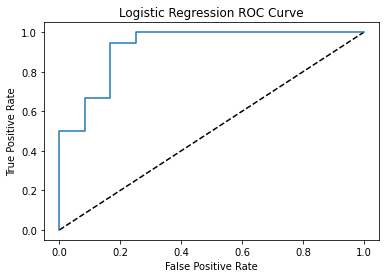

In [38]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [39]:
lr=LogisticRegression()
penalty=["l1","l2"]
parameters={"penalty":penalty}
lr_searcher=GridSearchCV(lr,parameters)
lr_searcher.fit(X_train,y_train.values.ravel())
print("Best parameters:",lr_searcher.best_params_)

Best parameters: {'penalty': 'l2'}


In [40]:
y_pred=lr_searcher.predict(X_test)

In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



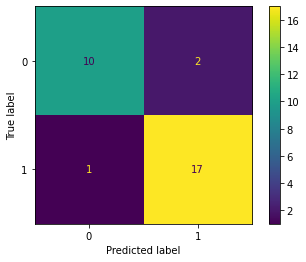

In [42]:
metrics.plot_confusion_matrix(lr_searcher,X_test,y_test)

## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [44]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9216417910447762
RandomForestClassifierModel Test Score is :  0.7666666666666667
RandomForestClassifierModel features importances are :  [0.08045489 0.04871815 0.05780862 0.11125497 0.09009673 0.03305291
 0.01549997 0.02611396 0.01970874 0.00765407 0.01631394 0.00070236
 0.07442999 0.04642667 0.04917009 0.02338712 0.02767084 0.01030797
 0.00093673 0.00702042 0.1425687  0.11070215]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 1 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.92975639 0.07024361]
 [0.17221127 0.82778873]
 [0.26861238 0.73138762]
 [0.65449199 0.34550801]
 [0.12854294 0.87145706]
 [0.06493096 0.93506904]
 [0.11487666 0.88512334]
 [0.27624343 0.72375657]
 [0.61058696 0.38941304]
 [0.2189124  0.7810876 ]]


In [45]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.79      0.83      0.81        18

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30



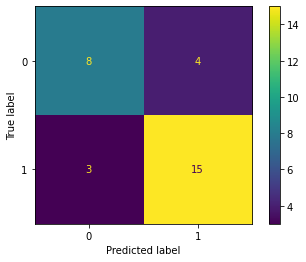

In [46]:
metrics.plot_confusion_matrix(RandomForestClassifierModel,X_test,y_test)

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.8843283582089553
DecisionTreeClassifierModel Test Score is :  0.8
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.08828297 0.06137581 0.05948586 0.0937948  0.08112947 0.07036851
 0.         0.         0.05857036 0.         0.         0.
 0.03807095 0.         0.02928445 0.         0.         0.
 0.         0.         0.4196368  0.        ]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [0 1 1 1 1 1 1 1 0 1]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.93150685 0.06849315]
 [0.2        0.8       ]
 [0.2        0.8       ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.25       0.75      ]
 [0.2        0.8       ]
 [0.83333333 0.16666667]
 [0.2        0.8       ]]


In [49]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.80      0.89      0.84        18

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



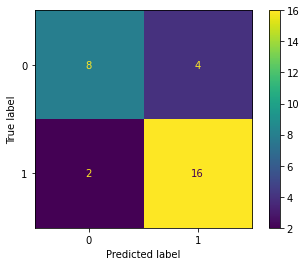

In [50]:
metrics.plot_confusion_matrix(DecisionTreeClassifierModel,X_test,y_test)

## K-nn Classifier

In [51]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier_k = KNeighborsClassifier(n_neighbors=5)
classifier_k.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = classifier_k.predict(X_test)

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.84      0.89      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



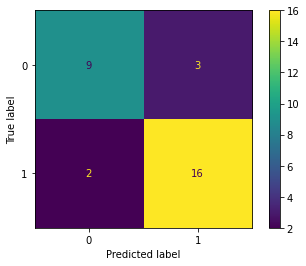

In [55]:
metrics.plot_confusion_matrix(classifier_k,X_test,y_test)

## Naive Bayes Classifier


In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [57]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        18

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



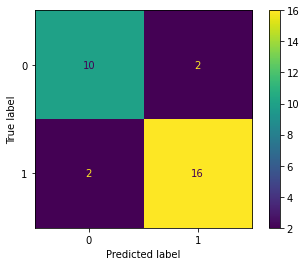

In [59]:
metrics.plot_confusion_matrix(classifier,X_test,y_test)

## Support Vector Classifier

In [60]:
from sklearn import svm

In [61]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



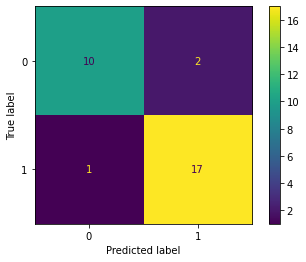

In [63]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

## XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [79]:
classifier = XGBClassifier(eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.84      0.89      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



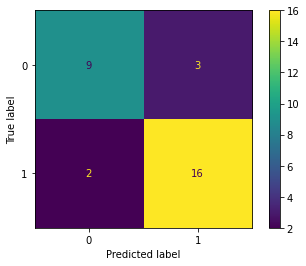

In [81]:
metrics.plot_confusion_matrix(classifier,X_test,y_test)

## LightGBM Classifier

In [70]:
import lightgbm as lgbm
from sklearn import metrics

In [71]:
lgbm_model = lgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.332864	valid_0's binary_logloss: 0.442466
[40]	training's binary_logloss: 0.212811	valid_0's binary_logloss: 0.389134
[60]	training's binary_logloss: 0.150607	valid_0's binary_logloss: 0.361305
[80]	training's binary_logloss: 0.107812	valid_0's binary_logloss: 0.344858
[100]	training's binary_logloss: 0.0796964	valid_0's binary_logloss: 0.336964


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [76]:
print(metrics.classification_report(y_test,lgbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.84      0.89      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



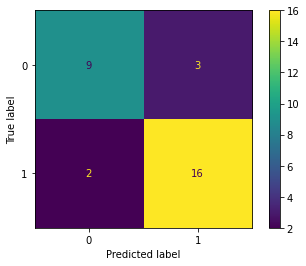

In [77]:
metrics.plot_confusion_matrix(lgbm_model,X_test,y_test)

## CatBoost Classifier 

In [82]:
from catboost import CatBoostClassifier

In [83]:
clf = CatBoostClassifier(iterations=10, learning_rate=0.1) 
#loss_function='CrossEntropy'

In [84]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test),verbose=False)

In [85]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 10, 'learning_rate': 0.1}


In [86]:
clf.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 0.6339914	test: 0.6308611	best: 0.6308611 (0)	total: 4.72ms	remaining: 42.5ms
1:	learn: 0.5796509	test: 0.5890889	best: 0.5890889 (1)	total: 6.94ms	remaining: 27.7ms
2:	learn: 0.5436244	test: 0.5669994	best: 0.5669994 (2)	total: 8.86ms	remaining: 20.7ms
3:	learn: 0.5106393	test: 0.5386475	best: 0.5386475 (3)	total: 10.6ms	remaining: 15.9ms
4:	learn: 0.4757051	test: 0.5190211	best: 0.5190211 (4)	total: 12.6ms	remaining: 12.6ms
5:	learn: 0.4466419	test: 0.4983371	best: 0.4983371 (5)	total: 14.5ms	remaining: 9.65ms
6:	learn: 0.4235682	test: 0.4842735	best: 0.4842735 (6)	total: 16.8ms	remaining: 7.18ms
7:	learn: 0.4020402	test: 0.4772036	best: 0.4772036 (7)	total: 18.7ms	remaining: 4.69ms
8:	learn: 0.3875800	test: 0.4803486	best: 0.4772036 (7)	total: 20.8ms	remaining: 2.31ms
9:	learn: 0.3663636	test: 0.4646992	best: 0.4646992 (9)	total: 22.6ms	remaining: 0us

bestTest = 0.4646991814
bestIteration = 9



In [87]:
y_pred=clf.predict(data=X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [88]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.80      0.67      0.73        18

    accuracy                           0.70        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.72      0.70      0.70        30



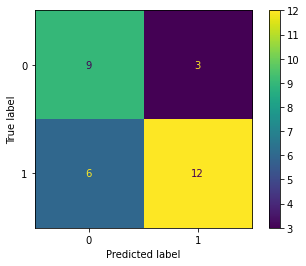

In [89]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

## AdaBoost Classifier 

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
abc =AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [92]:
model = abc.fit(X_train, y_train)

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [95]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.84      0.89      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



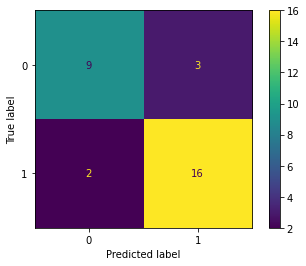

In [96]:
metrics.plot_confusion_matrix(model,X_test,y_test)